In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


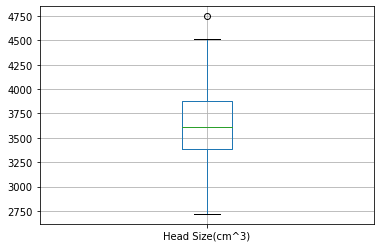

In [44]:
data = pd.read_csv("headbrain.csv")
print(data.shape)
print(data.head())
#data.boxplot(column=['Head Size(cm^3)'])
#type(data['Head Size(cm^3)'][0])
#data = data[data['Head Size(cm^3)'] < 4500]
print(data.head())
data.boxplot(column=['Head Size(cm^3)'])

In [45]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values


In [46]:
mean_x = np.mean(X)
mean_y = np.mean(y)

m = len(X)

nume = 0
deno = 0
for i in range(0 ,m):
    nume += (X[i] - mean_x) * (y[i] - mean_y)
    deno += (X[i] - mean_x)**2
b1 = nume / deno
b0 = mean_y - (b1 * mean_x)
print(mean_y,"=",b0,"+",b1,"*",mean_x)

1282.873417721519 = 325.57342104944223 + 0.26342933948939945 * 3633.9915611814345


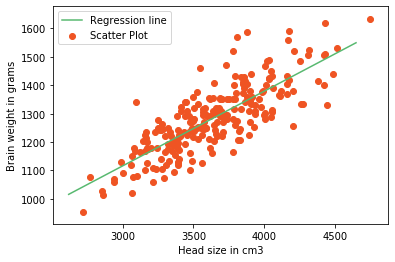

In [47]:
max_x = np.max(X) - 100
min_x = np.min(X) - 100

x_line = np.linspace(min_x, max_x, 1000)
y_line =b0 + b1 *x_line

plt.plot(x_line, y_line, c='#58b970', label = 'Regression line')
plt.scatter(X, y, c = '#ef5423', label = "Scatter Plot")

plt.xlabel("Head size in cm3")
plt.ylabel("Brain weight in grams")
plt.legend()
plt.show()

In [48]:
sst = 0
ssr = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    sst += (y[i] - mean_y) ** 2
    ssr += (y[i] - y_pred)**2
r2 = 1 - (ssr/sst)
print(r2)

0.6393117199570003


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

X = X.reshape(m, 1)


In [59]:
reg = LinearRegression()
reg = reg.fit(X, y)
Y_pred = reg.predict(X)
#r2_score = reg.score(X, y)
r2 = r2_score(y, Y_pred)
print(r2)

0.639311719957
